In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import *
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV

### Readin Data

In [2]:
full = pd.read_parquet('../data/curated/train_data/')
full = full.rename({'y_total_num_consumer': 'next_total_num_consumer', 'y_total_revenue': 'next_total_revenue', 'y_total_num_transaction': 'next_total_num_transaction'}, axis = 1)
full.dtypes

merchant_abn                    int64
total_num_consumer              int64
avg_dollar_value              float64
total_num_transaction           int64
mean_income                   float64
revenue_level                  object
total_revenue                 float64
total_num_postcode              int64
tag                            object
next_total_num_consumer       float64
next_total_revenue            float64
next_total_num_transaction    float64
dtype: object

### Visualisation

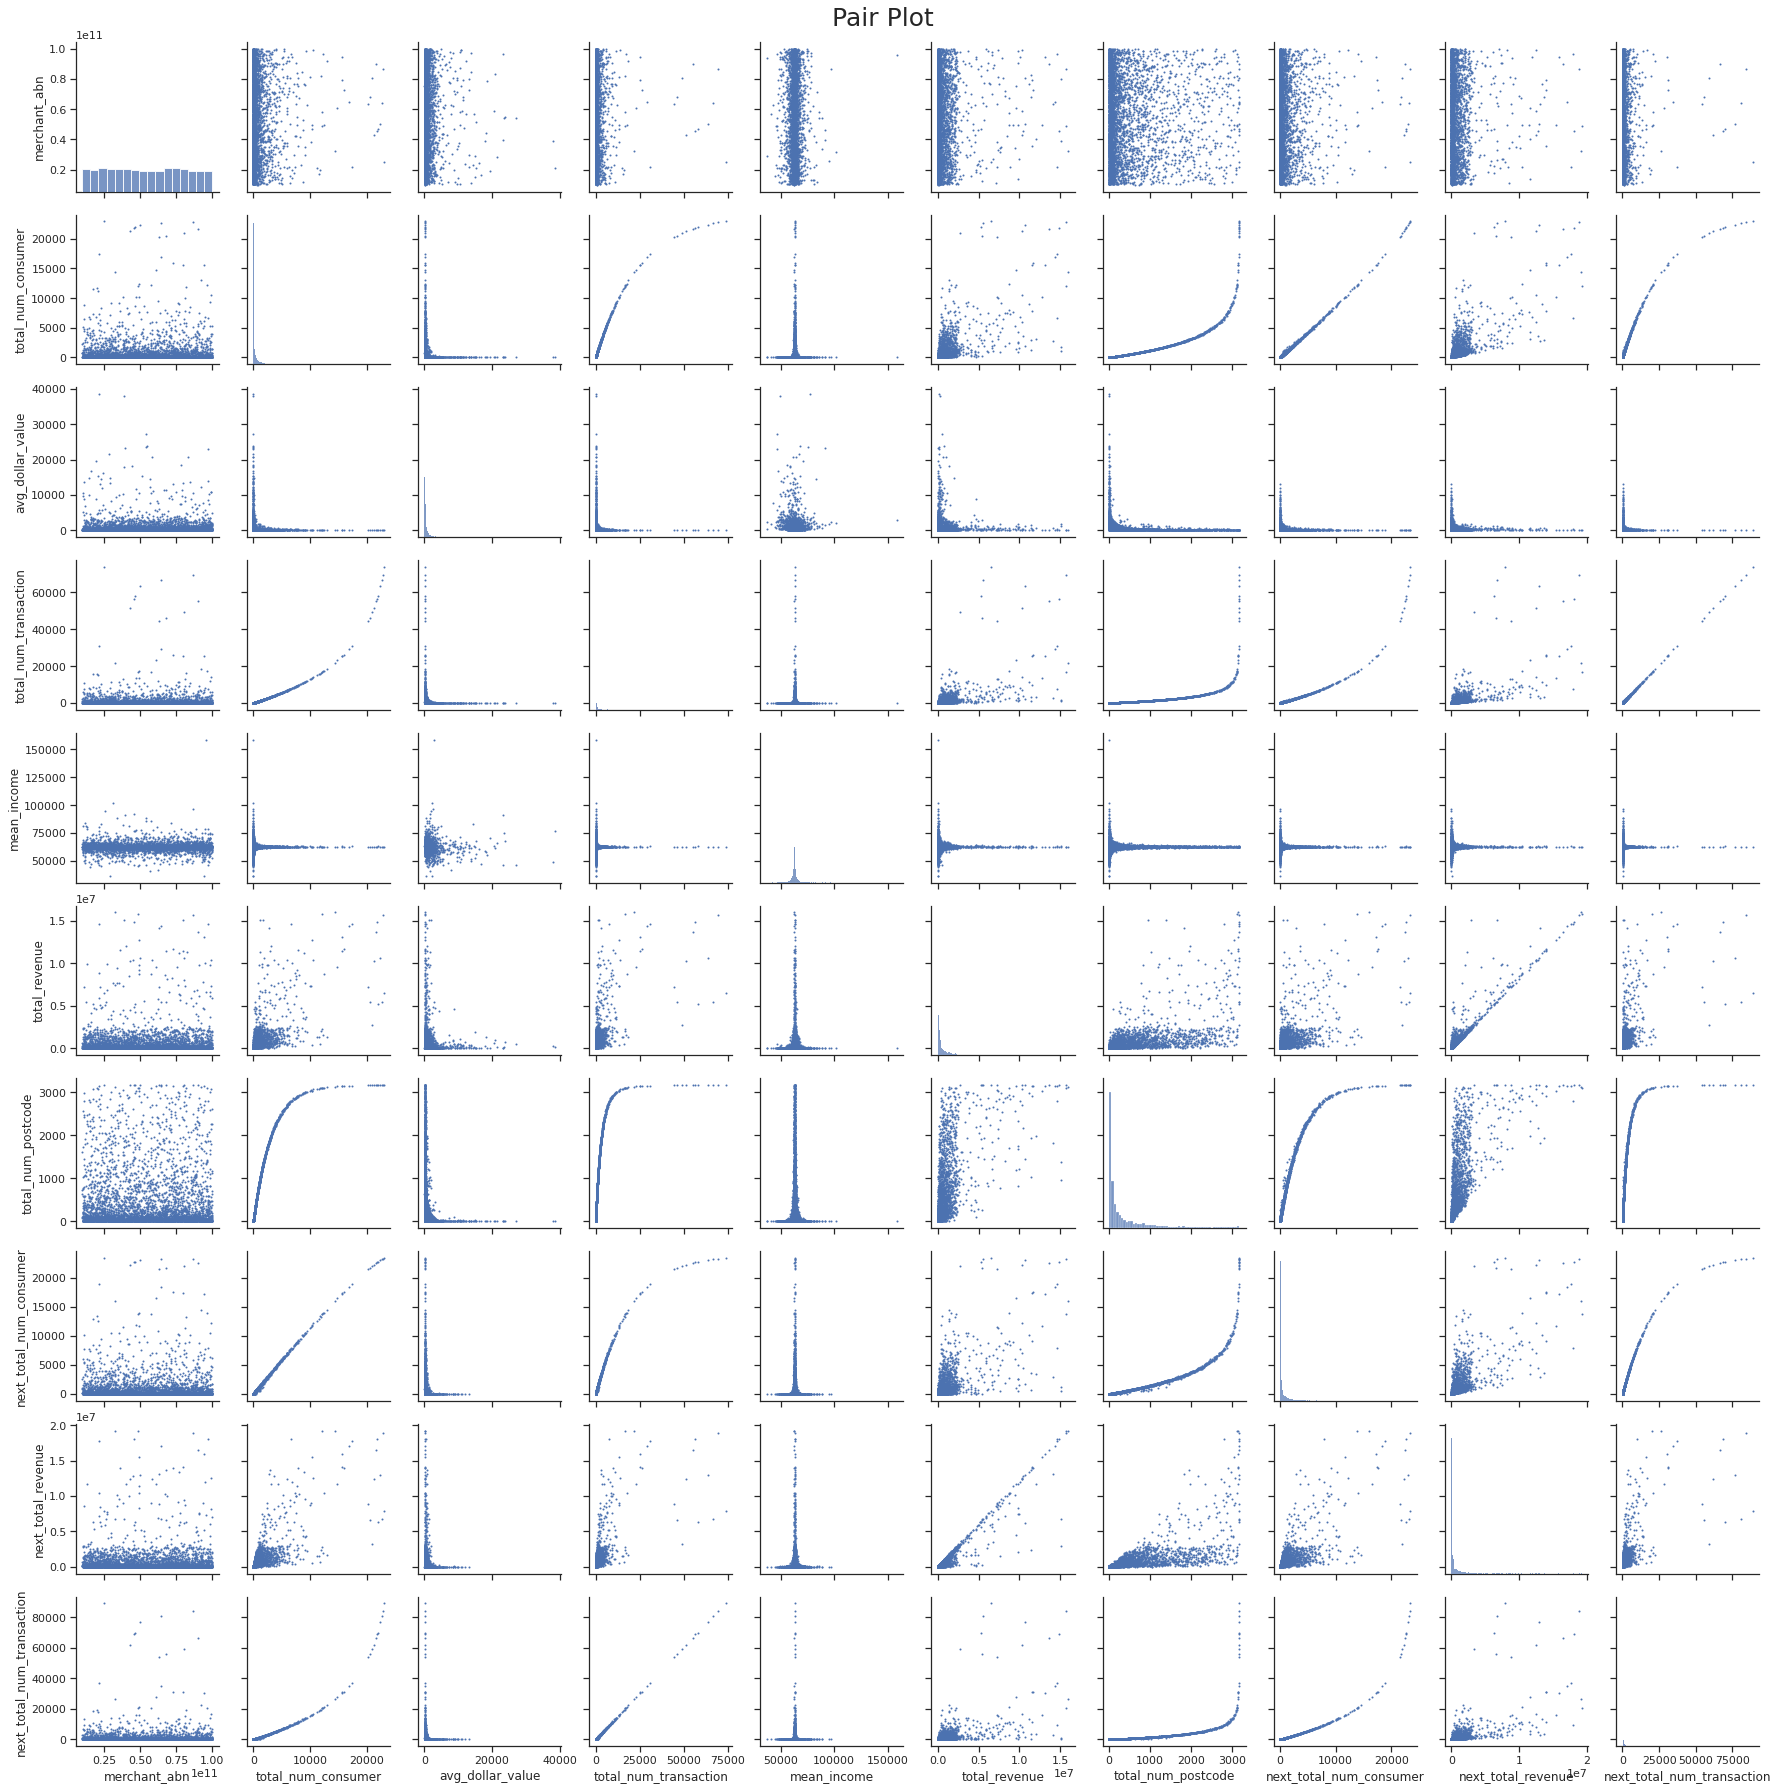

In [3]:
import seaborn as sbs
import matplotlib.pyplot as plt
x_axis = ['Merchant ABN', "Total num Consumer", "Average Dollar Value", "Total num Transaction", "Mean Income", "Total Revenue", "Total num Postcode", "Next Total num Consumer", "Next Total Revenue", "Next Total num Transaction"]
sbs.set(style="ticks", color_codes=True)
g = sbs.pairplot(full, plot_kws=dict(s=1, edgecolor="b", linewidth=1))
g.fig.suptitle("Pair Plot", y = 1, size = 25)
g.fig.savefig("../plots/Pair Plot for all features.jpg")
plt.show()

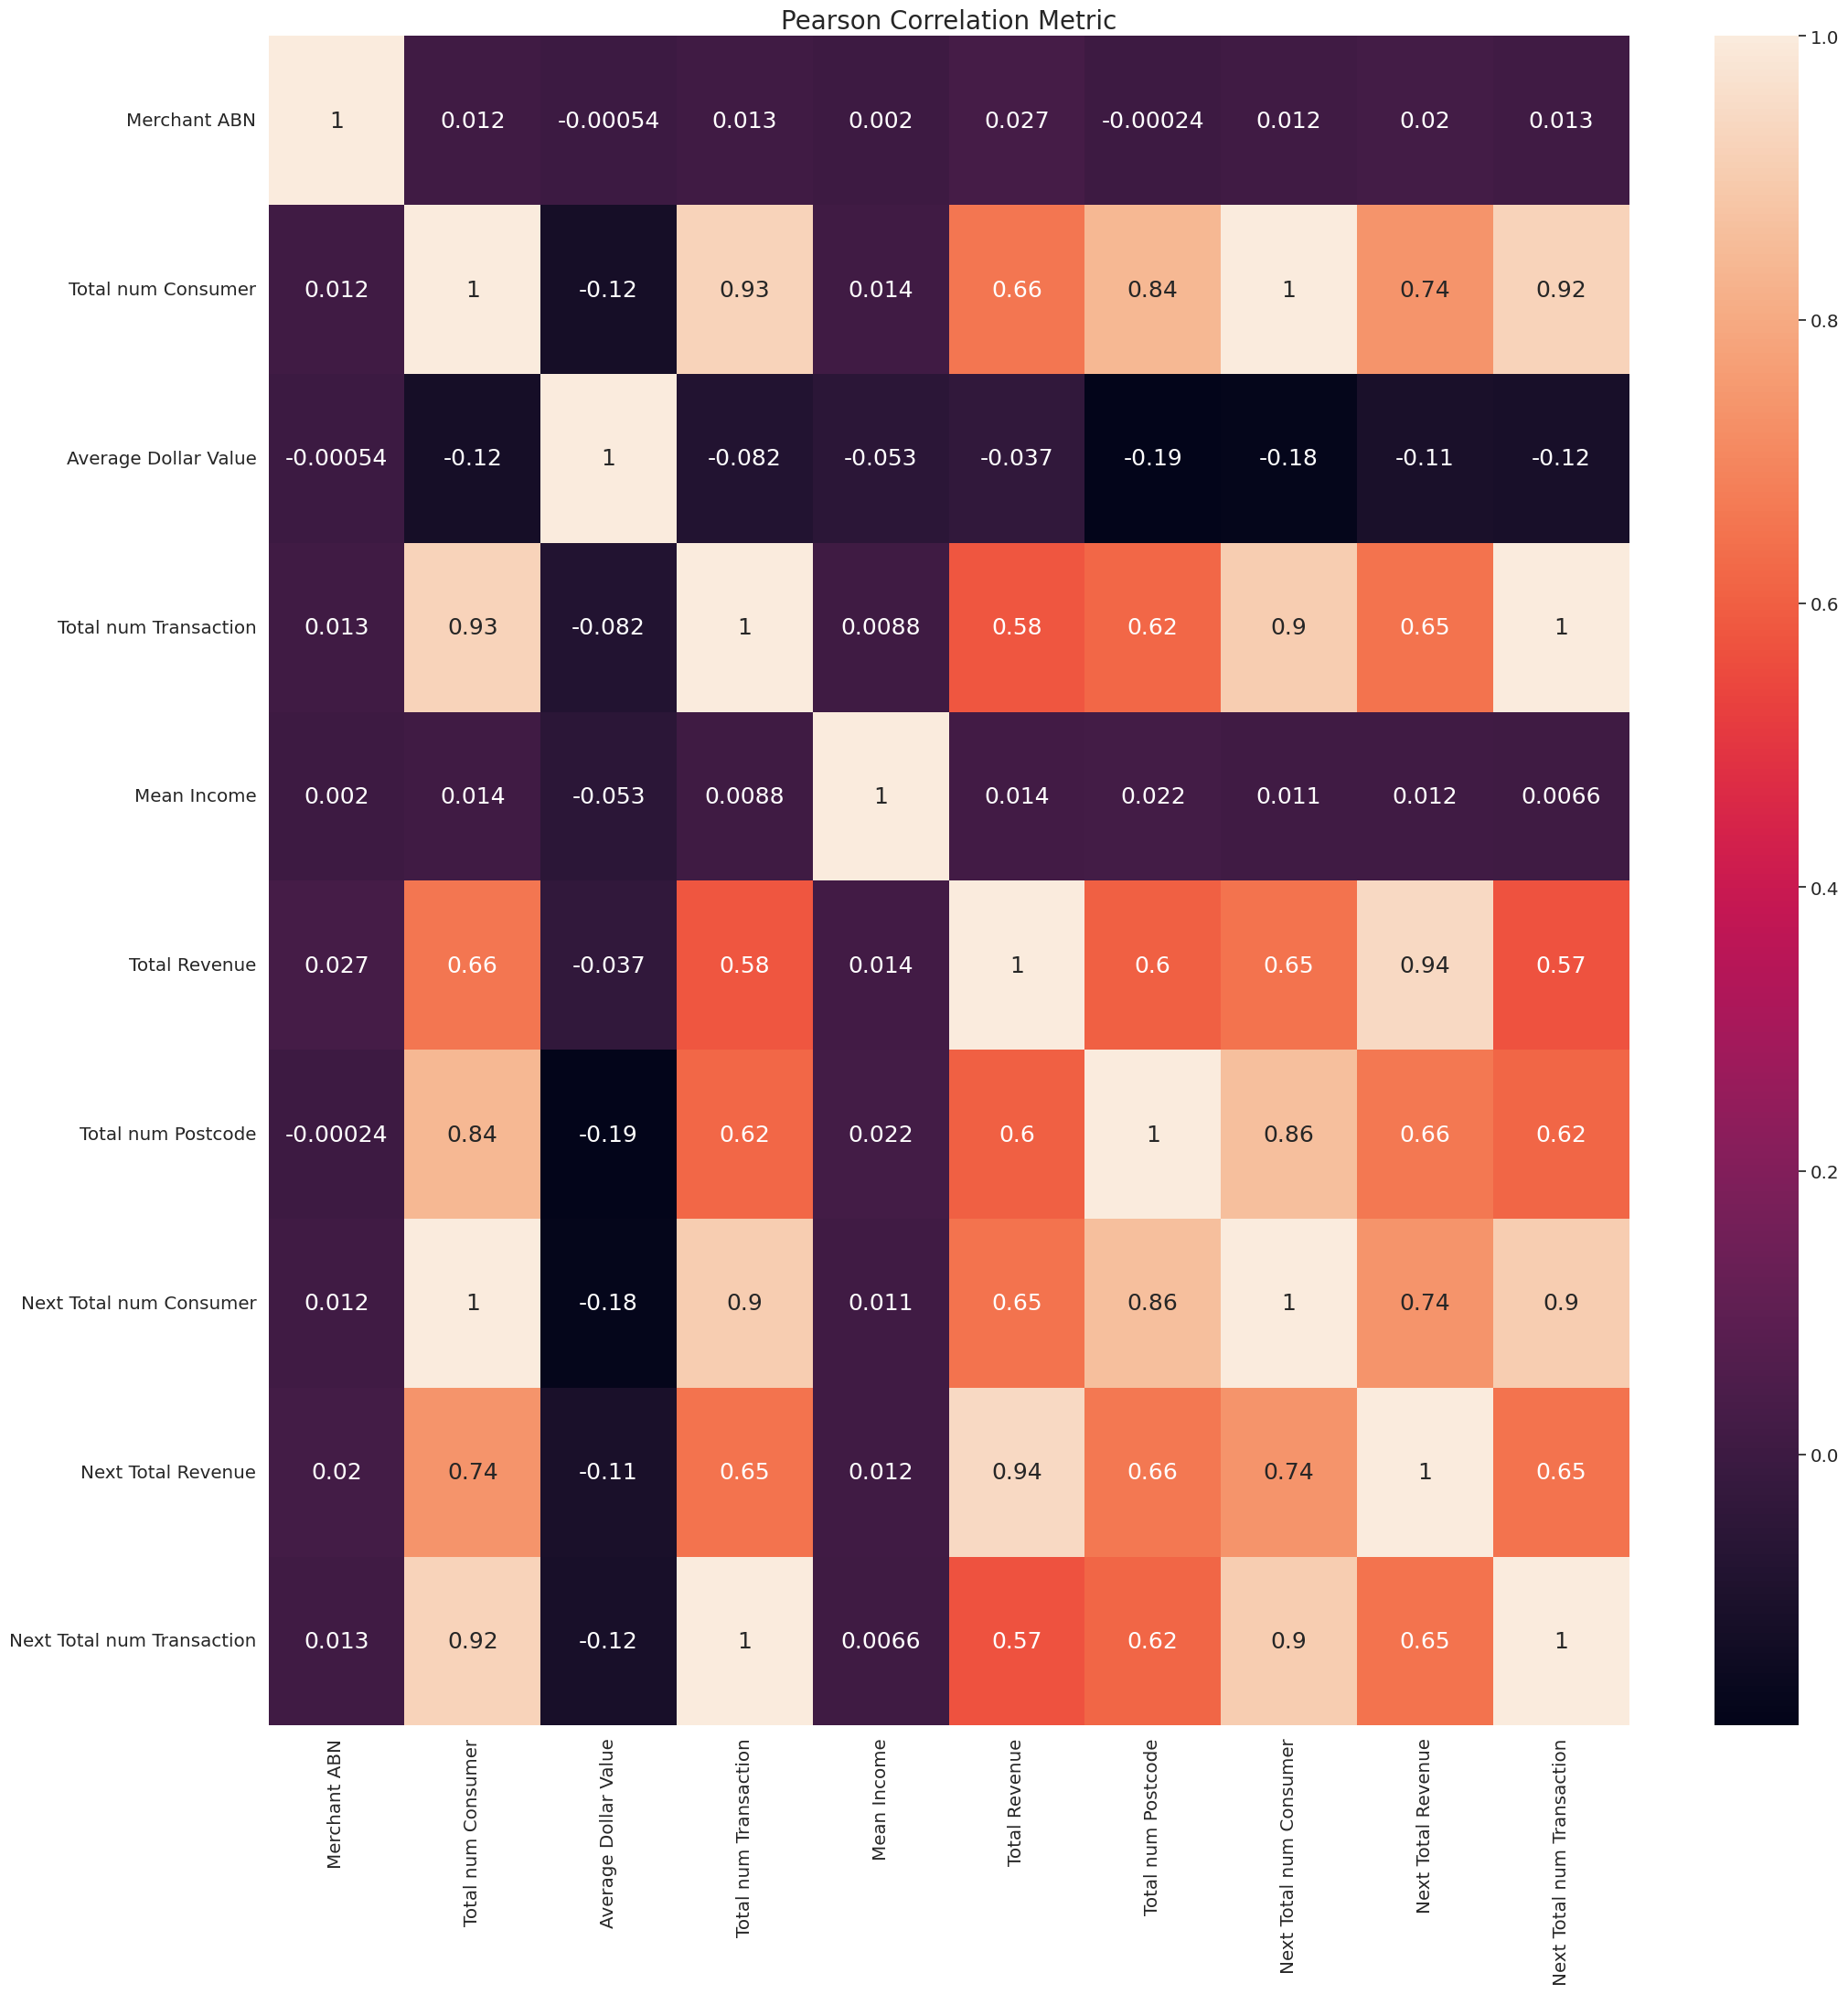

In [4]:
sbs.set(font_scale=1.3)
plt.figure(figsize = (24, 24))
sbs.heatmap(full.corr(), annot = True,annot_kws={"size": 18}, xticklabels=x_axis, yticklabels=x_axis)
plt.title('Pearson Correlation Metric', size = 20)
plt.savefig("../plots/Pearson Correlation Metric")

### Data Preprocessing

In [5]:
# drop the columns not needed
consumer_df = full[['tag', 'total_num_consumer', 'total_num_transaction', 'next_total_num_consumer']].dropna()
consumer_df

,tag,total_num_consumer,total_num_transaction,next_total_num_consumer
0,furniture,808,823,980.0
1,cable,731,750,918.0
2,watch,87,87,99.0
3,music,107,107,107.0
4,gift,2244,2370,2662.0
...,...,...,...,...
3948,opticians,3920,4285,4614.0
3949,books,33,33,40.0
3950,shoe,5353,6027,6134.0
3951,motor,45,45,69.0


In [6]:
# change tags into numeric feature by one hot encoding
enc = OneHotEncoder(handle_unknown='ignore')
tag_ohe = enc.fit_transform([[i] for i in consumer_df['tag']]).toarray()
tag_ohe

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
consumer_df[enc.categories_[0]] = tag_ohe
consumer_df = consumer_df
consumer_df

,tag,total_num_consumer,total_num_transaction,next_total_num_consumer,antique,art dealer,artist supply,bicycle,books,cable,...,hobby,jewelry,motor,music,opticians,shoe,stationery,telecom,tent,watch
0,furniture,808,823,980.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,cable,731,750,918.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,watch,87,87,99.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,music,107,107,107.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,gift,2244,2370,2662.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,opticians,3920,4285,4614.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3949,books,33,33,40.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3950,shoe,5353,6027,6134.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3951,motor,45,45,69.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Linear Regression

In [8]:
features = ['total_num_consumer', 'total_num_transaction']
X = np.array(consumer_df[features])
y = np.array(consumer_df['next_total_num_consumer'])
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.9990131260432068

In [9]:
# missing values will not be included
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
lr = LinearRegression()
fitted_model = lr.fit(X_train, y_train)
fitted_model.score(X_test, y_test)

0.9987879734559333

In [11]:
print("Coefficients: %s" % str(fitted_model.coef_))
print("Intercept: %s" % str(fitted_model.intercept_))

Coefficients: [ 1.25281763 -0.07934711]
Intercept: -1.6406699311660304


In [12]:
lr_predictions = fitted_model.predict(X_test)
lr_predictions

array([  57.032856  , 1625.3573012 , 6154.73906984, ...,  730.36689238,
        447.48115027,   13.61444681])

In [13]:
show_result = pd.DataFrame({'y_pred': lr_predictions, 'y_true': y_test})
show_result

,y_pred,y_true
0,57.032856,25.0
1,1625.357301,1709.0
2,6154.739070,6203.0
3,605.899670,690.0
4,1102.102269,1083.0
...,...,...
1130,0.706271,1.0
1131,26.522623,30.0
1132,730.366892,765.0
1133,447.481150,442.0


In [14]:
print("r2 score: ", r2_score(lr_predictions, y_test))
print("Mean Absolute Error: ", mean_absolute_error(lr_predictions, y_test))

r2 score:  0.9987914007221151
Mean Absolute Error:  35.08484128585443


### Neural Network with full Features

In [15]:
consumer_df

,tag,total_num_consumer,total_num_transaction,next_total_num_consumer,antique,art dealer,artist supply,bicycle,books,cable,...,hobby,jewelry,motor,music,opticians,shoe,stationery,telecom,tent,watch
0,furniture,808,823,980.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,cable,731,750,918.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,watch,87,87,99.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,music,107,107,107.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,gift,2244,2370,2662.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,opticians,3920,4285,4614.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3949,books,33,33,40.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3950,shoe,5353,6027,6134.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3951,motor,45,45,69.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
consumer_df = consumer_df.drop(columns = 'tag')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(consumer_df.loc[:, consumer_df.columns != 'next_total_num_consumer'], consumer_df['next_total_num_consumer'], test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((2647, 26), (1135, 26))

In [18]:
# scale train and test dataset in order to be standard normally distributed with zero mean
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)
X_trainscaled.shape, X_testscaled.shape

((2647, 26), (1135, 26))

In [19]:
mlp_reg_all = MLPRegressor(hidden_layer_sizes=(128,128,128,128),activation="relu" ,solver = 'adam', random_state=30034, max_iter=20000)\
    .fit(X_trainscaled, y_train)
y_pred=mlp_reg_all.predict(X_testscaled)
print("The Score with ", (metrics.r2_score(y_pred, y_test)))

The Score with  0.9980630448444944


In [20]:
df_result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_result.head()

,Actual,Predicted
565,25.0,10.627568
553,1709.0,1662.819009
2840,6203.0,6225.375424
3503,690.0,622.383857
808,1083.0,1100.757334


In [21]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('r2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 37.59645368726588
r2 Score: 0.9980970398936604


### Neural Network with selected Features

In [22]:
full

,merchant_abn,total_num_consumer,avg_dollar_value,total_num_transaction,mean_income,revenue_level,total_revenue,total_num_postcode,tag,next_total_num_consumer,next_total_revenue,next_total_num_transaction
0,10023283211,808,209.025160,823,62506.642770,e,3.096499e+04,719,furniture,980.0,3.894029e+04,1002.0
1,10142254217,731,41.119659,750,62693.954667,b,1.301437e+05,642,cable,918.0,1.544679e+05,925.0
2,10187291046,87,111.084087,87,61060.045977,b,3.179560e+04,87,watch,99.0,4.168321e+04,100.0
3,10192359162,107,451.143208,107,65637.383178,a,3.055638e+05,107,music,107.0,2.900710e+05,107.0
4,10206519221,2244,39.209217,2370,62122.522785,a,5.891499e+05,1619,gift,2662.0,6.667664e+05,2811.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3948,99938978285,3920,30.917688,4285,62782.274912,b,5.961703e+05,2255,opticians,4614.0,7.204531e+05,5104.0
3949,99974311662,33,319.209608,33,60450.212121,b,3.339252e+04,33,books,40.0,3.991901e+04,40.0
3950,99976658299,5353,150.114508,6027,62576.340468,a,5.944143e+06,2607,shoe,6134.0,6.974851e+06,7063.0
3951,99987905597,45,353.519570,45,61502.444444,a,1.084952e+05,45,motor,69.0,1.762053e+05,69.0


In [23]:
consumer_df = full[['total_num_consumer', 'total_num_transaction', 'total_revenue', 'total_num_postcode', 'next_total_num_consumer']].dropna()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(consumer_df.loc[:, consumer_df.columns != 'next_total_num_consumer'], consumer_df['next_total_num_consumer'], test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((2647, 4), (1135, 4))

In [25]:
# scale train and test dataset in order to be standard normally distributed with zero mean
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)
X_trainscaled.shape, X_testscaled.shape

((2647, 4), (1135, 4))

In [26]:
mlp_reg_selected = MLPRegressor(hidden_layer_sizes=(128,128,128,128),activation="relu" ,solver = 'adam', random_state=30034, max_iter=20000)\
    .fit(X_trainscaled, y_train)
y_pred=mlp_reg_selected.predict(X_testscaled)
print("The Score with ", (metrics.r2_score(y_pred, y_test)))

The Score with  0.9994754459083154


In [27]:
df_result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_result.head()

,Actual,Predicted
565,25.0,33.318122
553,1709.0,1686.009035
2840,6203.0,6256.738255
3503,690.0,630.896527
808,1083.0,1138.486980


In [28]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('r2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 26.455170009664158
r2 Score: 0.999469546154794


## Prediction

In [29]:
full_pred = full[['total_num_consumer', 'total_num_transaction', 'total_revenue', 'total_num_postcode', 'next_total_num_consumer']]
# only the missing value needs to be predicted by the model
train_pred = full_pred.loc[full_pred['next_total_num_consumer'].isnull()][['total_num_consumer', 'total_num_transaction', 'total_revenue', 'total_num_postcode']]
train_pred.shape

(171, 4)

In [30]:
# predict the missing value with pre-trained neural network model
revenue_pred = mlp_reg_selected.predict(train_pred)
train_pred['next_total_num_consumer'] = revenue_pred.tolist()
train_pred

/home/jinxuan/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


,total_num_consumer,total_num_transaction,total_revenue,total_num_postcode,next_total_num_consumer
10,5,5,23758.806015,5,7591.375721
16,1,1,56170.128286,1,17533.899381
23,8,8,571244.079843,8,178191.949597
29,1,1,32971.716744,1,10309.877998
48,4,4,265915.804518,4,82961.838033
...,...,...,...,...,...
3858,11,11,93883.360758,11,29653.889624
3864,27,27,461374.870800,27,144692.966318
3868,7,7,354552.824888,7,110676.353160
3916,8,8,441812.668866,8,137886.807203


In [31]:
full.isnull().sum()

merchant_abn                    0
total_num_consumer              0
avg_dollar_value                0
total_num_transaction           0
mean_income                     0
revenue_level                   0
total_revenue                   0
total_num_postcode              0
tag                             0
next_total_num_consumer       171
next_total_revenue            171
next_total_num_transaction    171
dtype: int64

In [32]:
# combine the missing value prediction with origin dataset
final_full = full.fillna(train_pred)

# check for existance of missing values
final_full.isnull().sum()

merchant_abn                    0
total_num_consumer              0
avg_dollar_value                0
total_num_transaction           0
mean_income                     0
revenue_level                   0
total_revenue                   0
total_num_postcode              0
tag                             0
next_total_num_consumer         0
next_total_revenue            171
next_total_num_transaction    171
dtype: int64

In [33]:
final_full.to_csv('../data/curated/full_consumer.csv')

In [34]:
final_full

,merchant_abn,total_num_consumer,avg_dollar_value,total_num_transaction,mean_income,revenue_level,total_revenue,total_num_postcode,tag,next_total_num_consumer,next_total_revenue,next_total_num_transaction
0,10023283211,808,209.025160,823,62506.642770,e,3.096499e+04,719,furniture,980.0,3.894029e+04,1002.0
1,10142254217,731,41.119659,750,62693.954667,b,1.301437e+05,642,cable,918.0,1.544679e+05,925.0
2,10187291046,87,111.084087,87,61060.045977,b,3.179560e+04,87,watch,99.0,4.168321e+04,100.0
3,10192359162,107,451.143208,107,65637.383178,a,3.055638e+05,107,music,107.0,2.900710e+05,107.0
4,10206519221,2244,39.209217,2370,62122.522785,a,5.891499e+05,1619,gift,2662.0,6.667664e+05,2811.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3948,99938978285,3920,30.917688,4285,62782.274912,b,5.961703e+05,2255,opticians,4614.0,7.204531e+05,5104.0
3949,99974311662,33,319.209608,33,60450.212121,b,3.339252e+04,33,books,40.0,3.991901e+04,40.0
3950,99976658299,5353,150.114508,6027,62576.340468,a,5.944143e+06,2607,shoe,6134.0,6.974851e+06,7063.0
3951,99987905597,45,353.519570,45,61502.444444,a,1.084952e+05,45,motor,69.0,1.762053e+05,69.0
